# Simple example demonstrating 2D-DCT as foundation of JPEG image encoding

This demo is supposed to shed some light on performing a two-dimensional [discrete cosine transform (DCT)](https://en.wikipedia.org/wiki/Discrete_cosine_transform). Therefore, the example of image compression, more precise the DCT as the underlying idea of [JPEG](https://en.wikipedia.org/wiki/JPEG) encoding is used.

This demo is written by [Markus Nölle](https://www.htw-berlin.de/hochschule/personen/person/?eid=9586) for a basic course on communications engineering hold at the [university of applied sciences, Berlin](https://www.htw-berlin.de/).

Parts of this example are inspired by a [tutorial](https://inst.eecs.berkeley.edu/~ee123/sp16/Sections/JPEG_DCT_Demo.html) written by [Frank Ong](https://www.frankongh.com/) for a [course](https://inst.eecs.berkeley.edu/~ee123/sp17/) on [digital dignal processing](https://en.wikipedia.org/wiki/Digital_signal_processing) at [Berkeley university](https://www.berkeley.edu/)

## Preparation of Python

First, all necessary libraries are load, defaults are set and important functions are defined.

### Import libraries ##

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as fftp
import matplotlib.pylab as pylab
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider, IntSlider

pylab.rcParams['figure.figsize'] = (20.0, 7.0)

### Define 2D-(I)DCT functions

In [2]:
def dct2(im):
    '''Perform a 2 dimensional discrete cosine transform (DCT) in the input MxN array'''
    return fftp.dct(fftp.dct(im, axis=0), axis=1)
def idct2(IM):
    '''Perform a 2 dimensional inverse discrete cosine transform (IDCT) in the input MxN array'''
    return fftp.idct(fftp.idct(IM, axis=0), axis=1)

---

## Generate (artificial) images from 8x8 DCT coefficients 

In this section the corresponding 8x8 images of different, individual DCT coefficients within the set of 64 coefficients (e.g. 8x8 image) are inspected. It can be seen that the upper left DCT coefficient is the representation of the mean luminosity of the 8x8 image. Further, horizontally and vertically alligned coefficients correspond to horizontal and vertical luminosity (amplitude) changes of the image, respectively. The further down (or right) the coefficients are located, the faster is the resulting luminosity change (frequency of amplitude change) of the image. Also the resulting images of a combination of DCT coefficients can be generated.

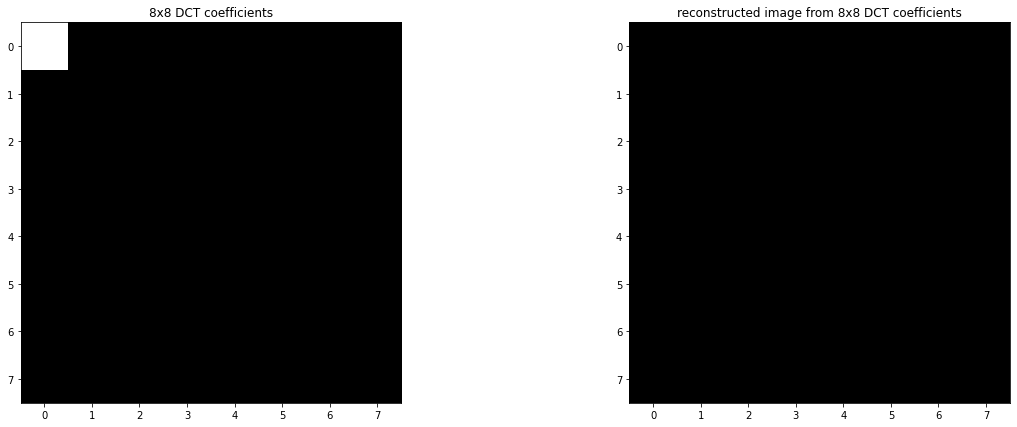

In [3]:
IM = np.zeros((8,8))
IM[0, 0] = 1;
# IM[7, 7] = 1;

im_rec = idct2(IM)

# plotting stuff
fig, ax = plt.subplots(1, 2)
ax[0].imshow(IM, cmap="gray")
ax[0].set(title="8x8 DCT coefficients")
ax[1].imshow(im_rec, cmap="gray")
ax[1].set(title="reconstructed image from 8x8 DCT coefficients");

## Demonstration of simple, artificial 8x8 images and corresponding DCT transforms

Here, some simple aritificial 8x8 images are generated and their corresponding 8x8 [DCT coefficients](https://en.wikipedia.org/wiki/Discrete_cosine_transform) are plotted. After this, the 8x8 DCT coefficients are used to reconstruct the original images. It can be seen, that the images are perfectly reconstructed from the coefficients, which means that both respresentations of the images (DCT coefficients and image data) are completely equivalent. Until now, no compression (or reduction in data size) has been performed yet.

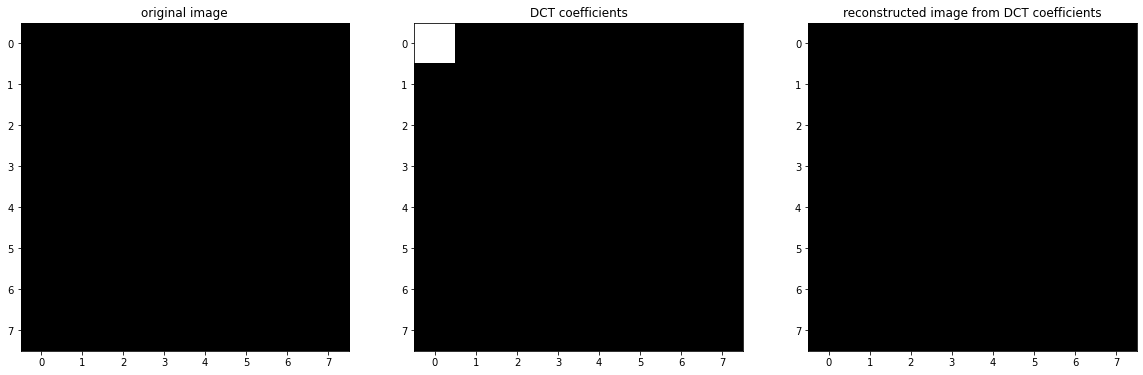

In [4]:
im = np.ones((8, 8))
# im = np.concatenate((np.ones((4, 8)), np.zeros((4, 8))), axis=0)
# im = np.concatenate((np.ones((8, 4)), np.zeros((8, 4))), axis=1)

IM = dct2(im)
im_rec = idct2(IM)

# plotting stuff
fig, ax = plt.subplots(1, 3)
ax[0].imshow(im, cmap="gray")
ax[0].set(title="original image")
ax[1].imshow(IM, cmap="gray")
ax[1].set(title="DCT coefficients")
ax[2].imshow(im_rec, cmap="gray")
ax[2].set(title="reconstructed image from DCT coefficients");

## Reduce (cut) DCT coefficients depending on amplitude

Here, reduction of the data size is performed for the first time: the DCT coefficients below a certain threshold are set to zero. This reduces the amount of image data. However, the image is not perfectly reconsrucable anymore, due to the reduced information of the DCT coefficients. The more aggressive the coefficients are [quantized](https://en.wikipedia.org/wiki/Quantization_(signal_processing)) (the larger the treshold is set), the more the resulting image is distorted.

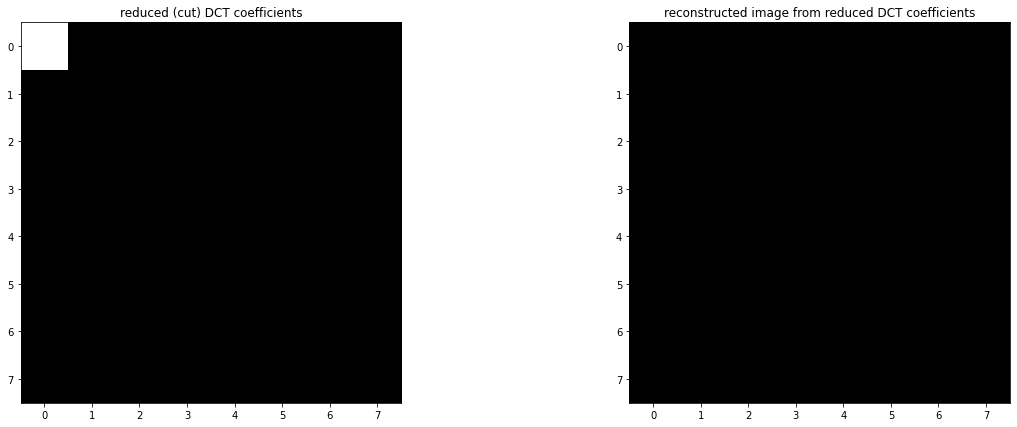

In [5]:
threshold = 10 #20, 40, 80, 100

IM_red = IM.copy()
IM_red[np.abs(IM) < threshold] = 0

im_red_rec = idct2(IM_red)

# plotting stuff
fig, ax = plt.subplots(1, 2)
ax[0].imshow(IM_red, cmap="gray")
ax[0].set(title="reduced (cut) DCT coefficients")
ax[1].imshow(im_red_rec, cmap="gray")
ax[1].set(title="reconstructed image from reduced DCT coefficients");

---

## Demonstration based on real image data

In this section, the former discussed basics are appied to a real image. For demonstration purposes, a grayscale version of the the famous [test image](https://en.wikipedia.org/wiki/Lenna) of [Lena Söderberg](https://en.wikipedia.org/wiki/Lena_S%C3%B6derberg) is used. 

### Load and plot image and DCT coefficients ##

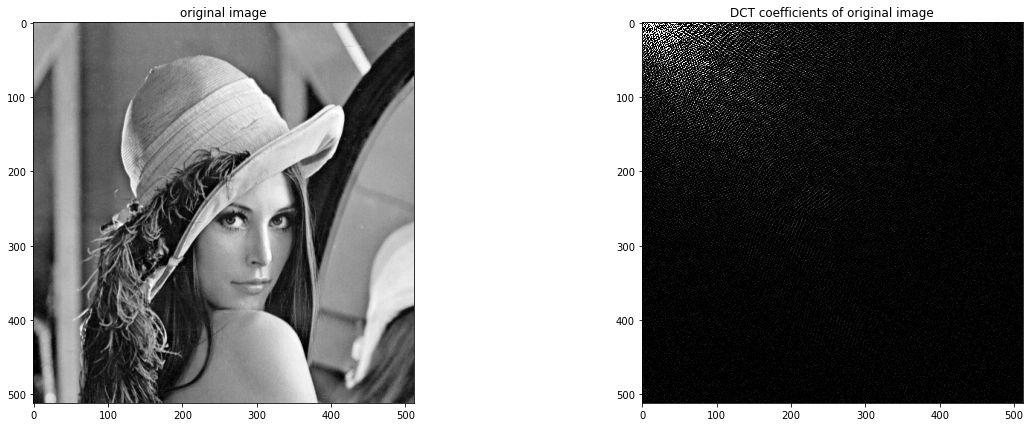

In [6]:
im = plt.imread('./images/lena_std.png')
# im = plt.imread('./images/peppers.png')
# im = plt.imread('./images/cameraman.png')
# im = plt.imread('./images/pirate.png')
im = np.mean(im, axis=-1)

IM = dct2(im)

# plotting stuff
fig, ax = plt.subplots(1, 2)
ax[0].imshow(im, cmap="gray")
ax[0].set(title="original image")
ax[1].imshow(IM, cmap="gray", vmin=0, vmax=np.max(IM)*0.0004)
ax[1].set(title="DCT coefficients of original image");

### Reduce coefficients (square cut) ##

In this section, the DCT coefficients are reduced by setting some of them to zero. In a first step, only the low frequency coefficients (a square starting from the upper right) are included for reconstruction of the image. The slider can be used to decide how many coefficients are included.

In [7]:
def reduce_rect(IM, cut = 50):
    n_Coeff_kept = cut**2;
    im_row, im_col = IM.shape
    
    # create mask
    mask_rect = np.ones((cut, cut))
    mask_rect = np.concatenate((mask_rect, np.zeros([cut, im_col-cut])), axis=1)
    mask_rect = np.concatenate((mask_rect, np.zeros([im_row-cut, im_col])), axis=0)

    # reduce coeffs
    IM_rect = IM * mask_rect

    im_rect =  idct2(IM_rect)
    
    # plotting stuff
    fig, ax = plt.subplots(1, 3)
    ax[0].imshow(IM, cmap="gray", vmin=0, vmax=np.max(IM)*0.0004)
    ax[0].set(title="DCT coefficients of original image");
    ax[1].imshow(mask_rect, cmap="gray")
    ax[1].set(title="mask to multiply DCT coefficients with");
    ax[2].imshow(IM_rect, cmap="gray", vmin=0, vmax=np.max(IM)*0.0004)
    ax[2].set(title="reduced DCT coefficients ({0:1.1f} %)".format(n_Coeff_kept/(im_row*im_col)*100));
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(im, cmap="gray")
    ax[0].set(title="original image");
    ax[1].imshow(im_rect, cmap="gray")
    ax[1].set(title="reconstructed, reduced image");
    
    
plot = interactive(reduce_rect, cut=IntSlider(min=1, max=IM.shape[0], step=1, value=1, continuous_update=False),  IM = fixed(IM));
out = plot.children[-1]
out.layout.height = '850px'
display(plot)

interactive(children=(IntSlider(value=1, continuous_update=False, description='cut', max=512, min=1), Output(l…

### Reduce coefficients (dependent on amplitude) ##

In this section, the DCT coefficients are reduced by setting some of them to zero. However, the decision which coefficients to include is not based on the corresponding frequency of the coefficient, but only on the amplitude of it. The slider can be used to decide which amplitudes in [dB](https://en.wikipedia.org/wiki/Decibel) (compared to the largest coefficient) are included in the reconstruction.

In [8]:
def reduce_amp(IM, treshold_dB=0):    
    im_row, im_col = IM.shape
    
    # generate mask
    threshold = np.max(np.abs(IM)) * 10**(treshold_dB/20)
    mask_amp = np.zeros(IM.shape);
    mask_amp[np.abs(IM) > threshold] = 1
    n_Coeff_kept = np.sum(mask_amp)

    # reduce coeffs
    IM_amp = IM * mask_amp

    im_amp =  idct2(IM_amp)
    
    # plotting stuff
    fig, ax = plt.subplots(1, 3)
    ax[0].imshow(IM, cmap="gray", vmin=0, vmax=np.max(IM)*0.0004)
    ax[0].set(title="DCT coefficients of original image");
    ax[1].imshow(mask_amp, cmap="gray")
    ax[1].set(title="mask to multiply DCT coefficients with");
    ax[2].imshow(IM_amp, cmap="gray", vmin=0, vmax=np.max(IM)*0.0004)
    ax[2].set(title="reduced DCT coefficients ({0:1.1f} %)".format(n_Coeff_kept/(im_row*im_col)*100));
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(im, cmap="gray")
    ax[0].set(title="original image");
    ax[1].imshow(im_amp, cmap="gray")
    ax[1].set(title="reconstructed, reduced image");
    
plot = interactive(reduce_amp, treshold_dB=IntSlider(min=-150, max=0, step=1, value=0, continuous_update=False),  IM = fixed(IM));
out = plot.children[-1]
out.layout.height = '850px'
display(plot)

interactive(children=(IntSlider(value=0, continuous_update=False, description='treshold_dB', max=0, min=-150),…

### Perform JPEG-like reduction

In this section, a more "JPEG-like" coefficient reduction is demonstrated: the image is first divided into blocks and the DCT is then performed on the individual blocks. However, the decision which amplitudes to keep is then performed on the amplitudes of all blocks simulaneously. The sliders can be used to decide the block size and the threshold of the amplitudes in [dB](https://en.wikipedia.org/wiki/Decibel) (compared to the largest coefficient) to include.

In [9]:
def reduce_jpeg(im, treshold_dB=0, block_size=8):    
    
    im_row, im_col = im.shape
    IM_block = np.zeros(im.shape)    
    
    # perform DCT on each block individually
    for r in np.arange(0, im_row, block_size):
        for c in np.arange(0, im_col, block_size):
            IM_block[r:(r+block_size), c:(c+block_size)] = dct2(im[r:(r+block_size), c:(c+block_size)])
            
    # create mask
    threshold = np.max(np.abs(IM_block)) * 10**(treshold_dB/20)
    mask_amp = np.zeros(IM_block.shape);
    mask_amp[np.abs(IM_block) >  threshold] = 1
    n_Coeff_kept = np.sum(mask_amp)

    # reduce coeffs
    IM_block_amp = IM_block * mask_amp
    
    # perform IDCT on each block of reduced DCT coeffs individually (reconstruct image)
    im_block_amp = np.zeros(im.shape)
    for r in np.arange(0, im_row, block_size):
        for c in np.arange(0, im_col, block_size):
            im_block_amp[r:(r+block_size),c:(c+block_size)] = idct2( IM_block_amp[r:(r+block_size),c:(c+block_size)] )
            
    # plotting stuff
    fig, ax = plt.subplots(1, 3)
    ax[0].imshow(IM_block, cmap="gray", vmin=0, vmax=np.max(IM)*2e-6)
    ax[0].set(title="DCT coefficients of original image");
    ax[1].imshow(mask_amp, cmap="gray")
    ax[1].set(title="mask to multiply DCT coefficients with");
    ax[2].imshow(IM_block_amp, cmap="gray", vmin=0, vmax=np.max(IM)*2e-6)
    ax[2].set(title="reduced DCT coefficients ({0:1.1f} %)".format(n_Coeff_kept/(im_row*im_col)*100));
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(im, cmap="gray")
    ax[0].set(title="original image");
    ax[1].imshow(im_block_amp, cmap="gray")
    ax[1].set(title="reconstructed, reduced image");
    
plot = interactive(reduce_jpeg,
         treshold_dB=IntSlider(min=-150, max=0, step=1, value=0, continuous_update=False),
         block_size=IntSlider(min=8, max=im.shape[0], step=8, value=8, continuous_update=False),
         im = fixed(im));
out = plot.children[-1]
out.layout.height = '850px'
display(plot)

interactive(children=(IntSlider(value=0, continuous_update=False, description='treshold_dB', max=0, min=-150),…